In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-dataset/wineQualityInfo.txt
/kaggle/input/red-wine-dataset/wineQualityReds.csv


# Welcome to a full guide on K-nearest Neighbor 🤩😎

#### K-nearest Neighbor, more well known as simply just KNN is a very simple and intuitive machine learning algorithm. 
#### I wouldn't say it is a very powerful nor efficient one but it is good to keep it in your arsenal just in case. 
#### As usual, I will show you the mathematics behind this intuitive algorithm and end this off with some written code to illustrate you how the algorithm is made.
#### Now I know I've used the word 'intuitive' twice, but that's for a reason you shall soon see. 

#### Shall we dive in then?

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1527588574470-7152d7c3c15e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8OHx8ZGl2ZSUyMGlufGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60" style="width:50%;height:50%;margin:auto;"> </div>

# 1. Introduction

#### Some obvious questions you should have in mind when learning or using KNN is, what on earth does the K mean? 
#### Now before we jump into that section, let me briefly explain to you the traits of this algorithm. 
#### I always believe in a top-down approach to learning as you get to learn the basics/big picture before jumping into the tiny details that define this algorithm.

#### Some notable traits of KNN algorithm is as such 
* It is sensitive to feature scales
* Can be used for both classification and regression 
* Supervised Learning
* Non-parametric

#### Allow me to briefly explain to you the points above.
#### KNN is sensitive to unbalanced scaling in the feature variables due to its method of finding the K neighbors.
#### KNN calculates the distance between points to obtain these neighbors and thus obviously differently scaled features will affect this very distance. 
#### Therefore when using KNN, the user must always remember to scale the features.
#### One very famous method is to just standardize the features, which means ensuring the mean is 0 with unit standard deviation.

#### Yes, KNN can be also used for regression but is mainly a classification algorithm, thus I will be sticking with KNN for classification in this notebook.

#### KNN is indeed a supervised learning algorithm. 
#### This means that there must be a target variables along with the usual feature variables that we have. 

#### Finally, and I woul say is the most important trait, KNN is a non-parametric algorithm.
#### To understand this, one would first need to understand what a parametric and non-parametric algorithm is.
#### A parametric algorithm is one that relies on sets of weights and biases (parameters) to predict final results. These parameters can span from just a handful to million, like those we see in deep neural networks.
#### On the other hand, a non-parmaetric algorithm has no trainable parameters at all. It doesn't have any weights or biases but uses simple comparison techniques or other similiar ways to obtain an outcome.
#### So with this understood, remember that KNN is a **non-parametric** algorithm.

#### Now I have explained the traits of KNN, let us dive into the main mechanics of this algorithm and how it obtains the desired results.

# 2. Concept

#### Now the explanation of KNN is going to be shorter than the other models since it is a very simple algorithm. 
#### You will see why I keep saying this. 
#### But it's not all simple and great because as I said before, it isn't the most efficient. 
#### That is the reason why you don't see this algorithm being employed in a large scale classification problem. 

#### Ok with those 'disclaimers' out of the way, let me show you how this algorithm works.

#### The basic idea is this: From a dataset, we will find the k number of nearest datapoints to the specific datapoint and then assign the class that the majority of the neighboring datapoints possess.
#### To find the k nearest neighboring datapoints, we need to have a distance metric, and in this case that would mostly be the [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance) as shown below.

$$\LARGE d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

#### The above formula concerns finding the distance between two datapoints, namely p and q. 
#### The calculation consists of deducting every dimensions coordinates with the respective one in the other datapoint, squaring them, and summing them all up. 
#### If that sounded too complicated, let me show you the distance between two points.

$$\LARGE p = (2, 5, 10) $$
$$\LARGE q = (6, 2, 9) $$

$$\LARGE d\left( p,q\right) = \sqrt {(2-6)^2 + (5-2)^2 + (10-9)^2 } $$
$$\LARGE = \sqrt { 16 + 9 + 1 } $$
$$\LARGE = \sqrt {26} $$

#### For those of you who took basic geometry, this should always be at the back of your head as one of the most fundamental metrics of distance.

#### So using this formula, we would calculate the distance of all the datapoints from the specific datapoint. 
#### This is why I said before that this algorithm is not efficient as we need to calculate the dsitance between this datapoint and all the rest.

#### Once we got the distances, we go back to the stage above. 
#### We pick out K number of the nearest datapoints. 

#### Now once this is done, we observe the classes to which the K number of datasets belong to. 
#### Then, we calculate the proportions of the respective classes and assign the class with the highest proportion to the specific datapoint we were examining. 

#### Simple right? 
<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1621451683587-8be65b8b975c?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8c3VycHJpc2VkfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60" style="width:50%;height:50%;margin:auto;"> </div>


#### Unlike other models, there is no 'training' needed here, apart from fitting all the datapoints we have currently into our computer's memory so that the model can use them to compare to the datapoint with unknown class. 

#### Now that the explanation is out of the way, let me present to you the code behind this algorithm.

# 3. Data

#### For this notebook, I'll be using the famous wine dataset. 
#### To give you a basic overview of the dataset, it is a dataset consisting of different characteristics of wines.
#### The target variable in this case was the quality of these different wines, provided by wine experts.
#### Let us take a look at the dataset now.

In [2]:
df = pd.read_csv('../input/red-wine-dataset/wineQualityReds.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sample(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1102,6.1,0.48,0.09,1.70,0.078,18.0,30.0,0.99402,3.45,0.54,11.2,6
1421,7.5,0.40,0.18,1.60,0.079,24.0,58.0,0.99650,3.34,0.58,9.4,5
1006,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
354,6.1,0.21,0.40,1.40,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
1536,6.1,0.53,0.08,1.90,0.077,24.0,45.0,0.99528,3.60,0.68,10.3,6
878,8.8,0.61,0.19,4.00,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6
260,7.9,0.33,0.23,1.70,0.077,18.0,45.0,0.99625,3.29,0.65,9.3,5
1175,6.5,0.61,0.00,2.20,0.095,48.0,59.0,0.99541,3.61,0.70,11.5,6
390,5.6,0.85,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
360,8.2,0.70,0.23,2.00,0.099,14.0,81.0,0.99730,3.19,0.70,9.4,5


#### As you can see, we have 11 total features of wine and you can click [here](https://www.kaggle.com/datasets/piyushgoyal443/red-wine-dataset) if you wish to read in detail what each of the features mean.
#### The target variable is at the right most column called 'quality'. 
#### It ranges from 0 to 10 with 10 being the best quality and 0 being the worst.

#### Now as all data scientist, data analyst, machine learning engineer or whatever role you may have, one should always look at the general picture of the whoel dataset first.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
print("Shape of dataframe: {}".format(df.shape))

Shape of dataframe: (1599, 12)


#### As we can see, this dataframe is extremely neat and clean in the sense that it doesn't mean any imputation as it has no null values.
#### But one thing you have to remember about this algorithm, as I have mentioned above, is that KNN algorithm is sensitive to feature scaling as it allocates classes depending on the distances.
#### Let us go ahead and standardize our features.

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_df = scale.fit_transform(df) 
scaled_df

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

#### How about the target variable you may ask.

<AxesSubplot:xlabel='quality', ylabel='count'>

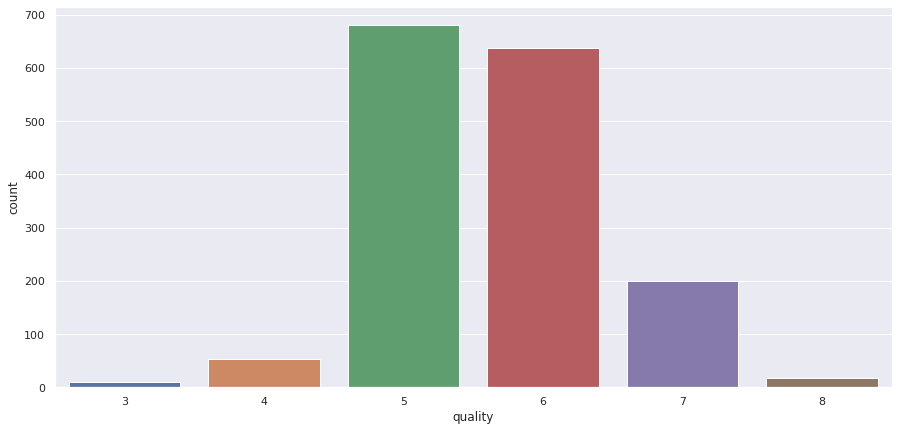

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot('quality', data = df)

#### As we can see, the majority of the values for quality lies within the 5 to 7 range.
#### There are no 0, 1, 2, 9 or 10 ratings.
#### This obvious imbalance and bias towards the 5 to 7 quality is not the most ideal to our machine learning algorithm. 
#### This sampling bias will possibly lead to our model outputting biased results.
#### The ideal case would be to have all the counts for quality spread out as evenly as possible.
#### For the time being, let's just keep this fact at the back of our heads and move on.

# 4. Code

#### Alright! Now I will proceed onto show you how the whole algorithm is written from scratch.

# 4.1 Splitting Dataset

#### Let us first split our dataset. 
#### I know I have said that there is not much training to this simple algorithm, but just for convention sake :)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df[:,:-1], np.array(df.iloc[:,-1]), test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1071, 11) (528, 11) (1071,) (528,)


#### Now that we've got our training and test sets, let us jump into the actual mechanism of KNN

# 4.2 Calculating Distance

#### First, the code for calculating the euclidean distance between two points.

In [9]:
def euclidean_dist(a,b):
    distance = np.square(a - b) 
    distance = np.sum(distance)
    distance = np.sqrt(distance) 
    return distance

#### Next, code for obtaining the distance from the test point to all the other points in the training dataset.

In [10]:
def distance_from_all_training(test_point):
    dist_array = np.array([])
    for train_point in X_train:
        dist = euclidean_dist(test_point, train_point)
        dist_array = np.append(dist_array,dist)
    return dist_array

# 4.3 Picking out K closest points

#### Now the code for combining all of the above into a function that takes in the training dataset, a set of test features and the number k.
#### This functino would return us the predictions for each datapoint in the test_feature input.

In [11]:
def KNNClassifier(train_features, train_target, test_features, k = 5):
    predictions = np.array([])
    train_target = train_target.reshape(-1,1)
    for test_point in test_features: 
        dist_array = distance_from_all_training(test_point).reshape(-1,1) 
        neighbors = np.concatenate((dist_array, train_target), axis = 1) 
        neighbors_sorted = neighbors[neighbors[:, 0].argsort()] 
        k_neighbors = neighbors_sorted[:k] 
        frequency = np.unique(k_neighbors[:, 1], return_counts=True)
        target_class = frequency[0][frequency[1].argmax()] 
        predictions = np.append(predictions, target_class)
    
    return predictions

# 4.4 Accuracy

#### Finally, before jumping in to see how our function works, we got to define our code to check the accuracy of our model.
#### We will come up with a block of code to compare our predictions with the test target features.

In [12]:
def accuracy(y_test, y_preds):
    total_correct = 0
    for i in range(len(y_test)):
        if int(y_test[i]) == int(y_preds[i]):
            total_correct += 1
    acc = total_correct/len(y_test) # Getting the proportion
    return acc*100 # In percentage form

# 4.5 Putting it all together

In [13]:
pred = KNNClassifier(X_train, y_train, X_test, k = 5)

#### Let us check the accuracy of this model.

In [14]:
acc = accuracy(y_test, pred)
print('Model accuracy = {:.2f}'.format(acc))

Model accuracy = 55.30


#### Let's see how Sklearn's KNN model does on this dataset.

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN()
model.fit(X_train, y_train)
preds = model.predict(X_test)

acc = accuracy(y_test, preds)
print('Model accuracy = {:.2f}'.format(acc))

Model accuracy = 55.30


#### Whao! Do you see that both the accuracies are the same. 
#### Although the accuracy is not that great to start off with, we can't blame our code for it since the Sklearn's one did not fare better.

#### Let us take one additional step and see how the random forest algorithm fares for this dataset.

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

preds = rf.predict(X_test)

acc = accuracy(y_test,preds)
print('Model accuracy = {:.2f}'.format(acc))

Model accuracy = 66.67


#### We can see that the random forest classifier does better than our KNN model.
#### There is a possibility that our KNN model may fare better with some hyperparameter tuning, the hyperparameter k.
#### However, KNN is a very simple model so it would be wise to not expect too much from it.

# 5. Conclusion

#### As we saw, implementing KNN from scratch really isn't too difficult a task.
#### You just need to understand what K represents and how this algorithm assigns classes to new datapoints.

#### With that, I hope you learnt the mechanics behind the KNN model.
#### If you did, do remember to upvote this notebook and check out my other notebooks on more machine learning algorithms explanation!

# 6. Credit

* https://towardsdatascience.com/ml-from-scratch-k-nearest-neighbors-classifier-3fc51438346b
* https://medium.com/analytics-vidhya/k-nearest-neighbor-the-maths-behind-it-how-it-works-and-an-example-f1de1208546c